Estudia los siguientes parámetros: precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindrada y condición.
Traza histogramas para cada uno de los parámetros.
Estudia cómo los valores atípicos afectan a la forma y legitimidad de los histogramas.
Determina los límites superiores de los valores atípicos, elimina dichos valores y almacénalos en un DataFrame apartado, y continúa tu trabajo con los datos filtrados.
Utiliza los datos filtrados para plantear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos).
Obtén conclusiones de cada histograma.
Estudia cuántos días los anuncios fueron mostrados (days_listed). Traza un histograma.
Calcula la media y la mediana. Describe la vida útil habitual de un anuncio.
Determina cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.
Analiza el número de anuncios y el precio medio para cada tipo de vehículo.
Traza un gráfico mostrando la dependencia de los números de anuncios en cada tipo de vehículo.
Selecciona los dos tipos con un mayor número de anuncios.
¿Qué factores impactan más sobre el precio? Toma cada uno de los tipos más populares que has detectado en la fase anterior y estudia si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color), traza gráficos de caja y bigotes, y crea gráficos de dispersión para el resto.
Cuando analices variables categóricas, observa que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.


Vamos a estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.


Descripción de los datos
El conjunto de datos contiene los siguientes datos:
price
model_year
model
condition
cylinders
fuel — gasolina, diesel, etc.
odometer — el millaje del vehículo cuando el anuncio fue publicado
transmission
paint_color
is_4wd — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
date_posted — la fecha en la que el anuncio fue publicado
days_listed — desde la publicación hasta que se elimina

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

READ DATA

In [218]:
data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Datasets/vehicles_us (1).csv')

In [219]:
data.head(100)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9995,2017.0,hyundai sonata,excellent,4.0,gas,105985.0,automatic,sedan,white,NaN,2018-05-02,18
96,24600,2013.0,ford mustang gt coupe 2d,good,8.0,gas,22474.0,other,coupe,white,NaN,2018-10-28,22
97,6500,2012.0,ford fusion se,excellent,6.0,gas,90000.0,automatic,sedan,grey,NaN,2018-09-20,94
98,3995,2008.0,subaru forester,excellent,4.0,gas,165000.0,automatic,SUV,white,1.0,2018-12-24,19


In [220]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Podemos observar con el metodo describe ya varios datos interesantes:
Observamos las columnas de tipo numerico:
    - Price: Donde ya podemos sacar la info de la media de precios de los automoviles que es de 12,132.46
    - Model Year: Observamos que la media de año es del 2009
    - DaysListed: Donde podemos ver ya que la media de dias de los automoviles anunciados es de 39.55476

Esta info nos puede ayudar en varias cosas:

1 - En establecer tramos y sustituir esos numeros por puntuaciones de acuerdo a los tramos.
2 - En sustituir los valores nulos por medias en caso que lo vayamos a realizar de esa manera.



In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [222]:
data.shape

(51525, 13)

In [223]:
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

VAMOS A ANALIZAR LOS DATOS

In [224]:
data['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [225]:
data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [226]:
data['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
138580.0      1
94624.0       1
123321.0      1
202627.0      1
139573.0      1
Name: odometer, Length: 17762, dtype: int64

In [227]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [228]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [229]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [230]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


- Una vez evaluadas las columnas del dataset podemos eliminar por que nos aporta la misma informacion la columna odometer que encima tiene muchos valores perdidos.
- Tambien observamos que hay muchisimos valores perdidos en la columna paint_color pero no vamos a sustituir por ningun valor de momento.
- La columna is_4wd simplemente no es que tenga valores perdidos es que lo han establecido como booleanos es decir 1.0 es que si y NaN es que no pero vamos a poner NaN como 0.0

In [231]:
data = data.drop(['odometer'], axis=1)
data['is_4wd'] = data['is_4wd'].fillna(0.0)
data['paint_color'] = data['paint_color'].fillna(0)

Ya tenemos informacion de los datos y de los datos faltantes pero vamos a examinar mas en profundidad por cada columna antes de eliminar o sustituir datos.

VAMOS A CREAR UNA NUEVA COLUMNA QUE NOS INDICA EL AÑO EN LOS QUE SE VENDE LOS AUTOMOVILES

In [232]:
data['date_sold'] = pd.to_datetime(data['date_posted']) + pd.to_timedelta(data['days_listed'], unit='d')

In [233]:
data['year_sold'] = data['date_sold'].dt.year

In [234]:
data['month_sold'] = data['date_sold'].dt.month

VAMOS A ANALIZAR LAS VENTAS POR AÑO Y POR MES

Text(0.5, 1.0, 'Vehicles sold by year and month')

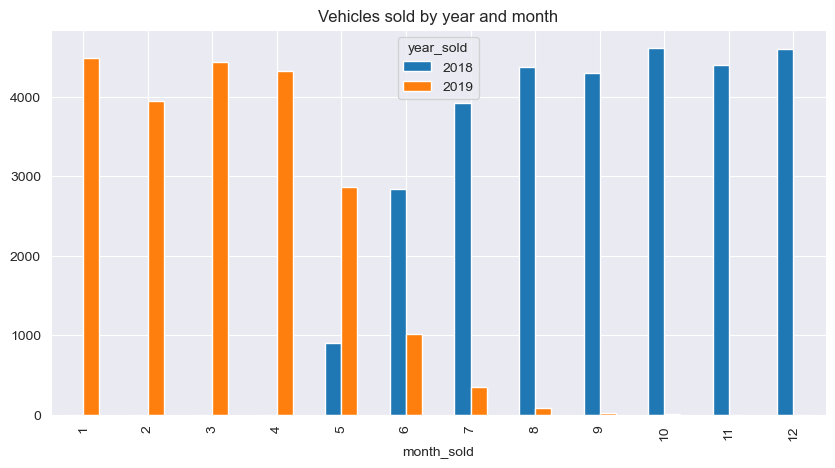

In [235]:
data.pivot_table(index='month_sold', columns='year_sold', values='price', aggfunc='count').plot(kind='bar', figsize=(10,5))
plt.title('Vehicles sold by year and month')

Sacamos las siguientes conclusiones de estos histogramas.

- En 2018 se vendio un 25% de mas que en el año 2019
- El crecimiento de 2018 fue positivo mientras que en 2019 fue negativo.

In [236]:
data['model'] = data['model'].str.split().str[0]

Acabamos de cambiar la columna de model solo por la primera parte del string por lo que ahora vamos a poder agrupar por marca.

Text(0.5, 1.0, 'Vehicles sold by month in 2018 and 2019 per model')

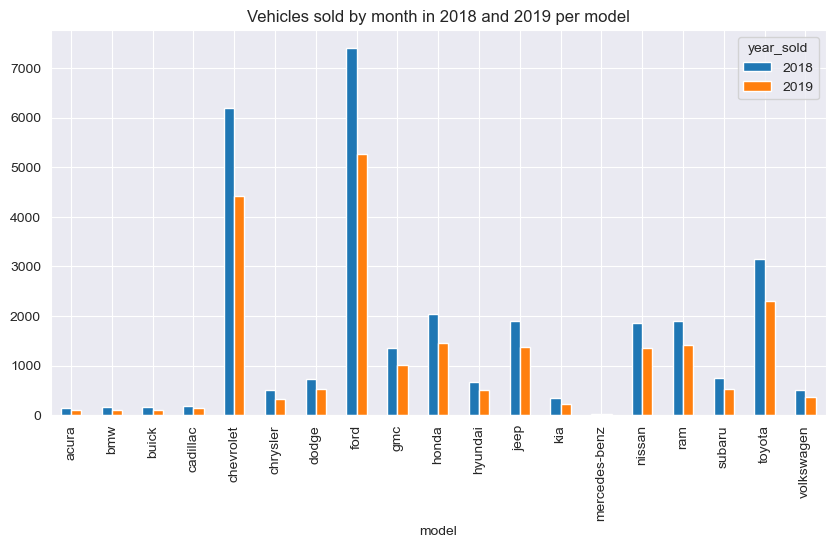

In [237]:
data.pivot_table(index='model', columns='year_sold', values='price', aggfunc='count').plot(kind='bar', figsize=(10,5))
plt.title('Vehicles sold by month in 2018 and 2019 per model')

En esta pivot table observamos varias similitudes y propocionales en 2018 y 2019.
- Primero observamos que en 2018 las ventas son mayores que en 2019
- Segunfo observamos que en las marcar que mas se venden propocionalmente por año son las mismas.
- Las 3 marcas mas vendidas son chevrolet, ford y toyota.

VAMOS A OBSERVAR LOS DATOS QUE NOS ARROJA EL HISTOGRAMA POR COLORES

Text(0.5, 1.0, 'Vehicles sold by month in 2018 and 2019 per color')

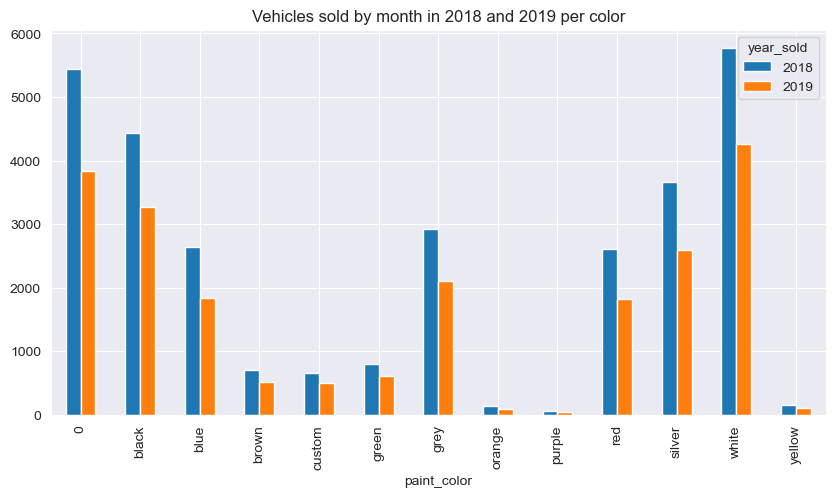

In [238]:
data.pivot_table(index='paint_color', columns='year_sold', values='model', aggfunc='count').plot(kind='bar', figsize=(10,5))
plt.title('Vehicles sold by month in 2018 and 2019 per color')

Observamos las mismas conclusiones que en la tabla de modelos.
- Los colores mas vendidos son blanco, negro y plateado.

OBSERVAMOS AHORA LOS DATOS POR LA CONDICION DEL VEHICULO

Text(0.5, 1.0, 'Vehicles sold per condition in 2018 and 2019')

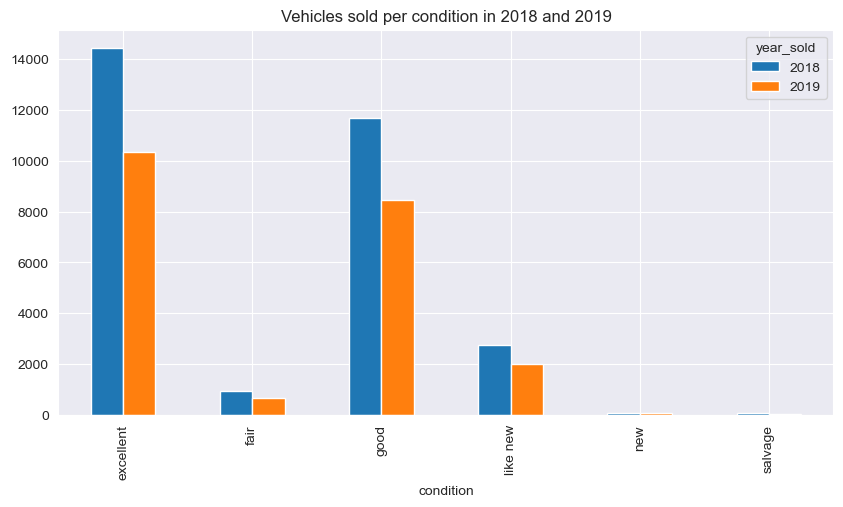

In [239]:
data.pivot_table(index='condition', columns='year_sold', values='model', aggfunc='count').plot(kind='bar', figsize=(10,5))
plt.title('Vehicles sold per condition in 2018 and 2019')

Los datos nos dicen que los vehiculos mas vendidos:

   - 1o los que tienen una condicion excelente.
   - 2o aquellos que tienen como condicion bueno.

ES EL TURNO DEL HISTOGRAMA POR CILINDRADA

Text(0.5, 1.0, 'Vehicles sold per cylinders in 2018 and 2019')

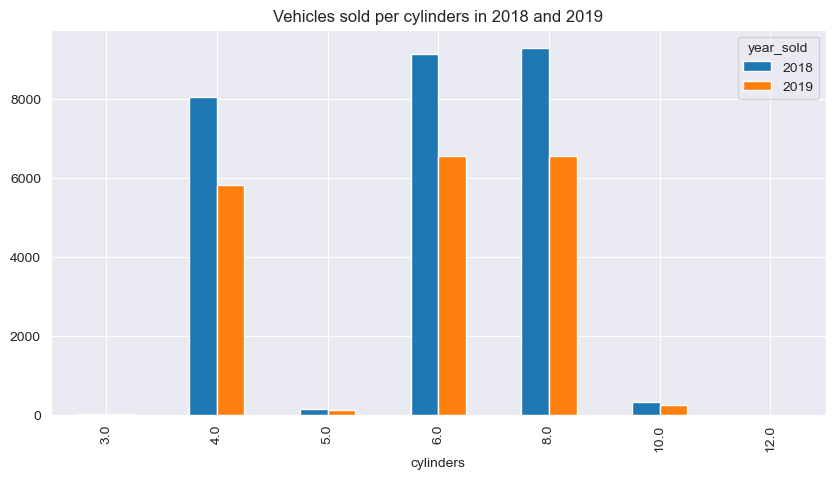

In [240]:
data.pivot_table(index='cylinders', columns='year_sold', values='model', aggfunc='count').plot(kind='bar', figsize=(10,5))
plt.title('Vehicles sold per cylinders in 2018 and 2019')

Claramente 3 principales:
- 8.0
- 6.0
- 4.0

ESTOS SON LOS DATOS QUE TENEMOS POR LA CONSTANTE FUEL

Text(0.5, 1.0, 'Vehicles sold per fuel in 2018 and 2019')

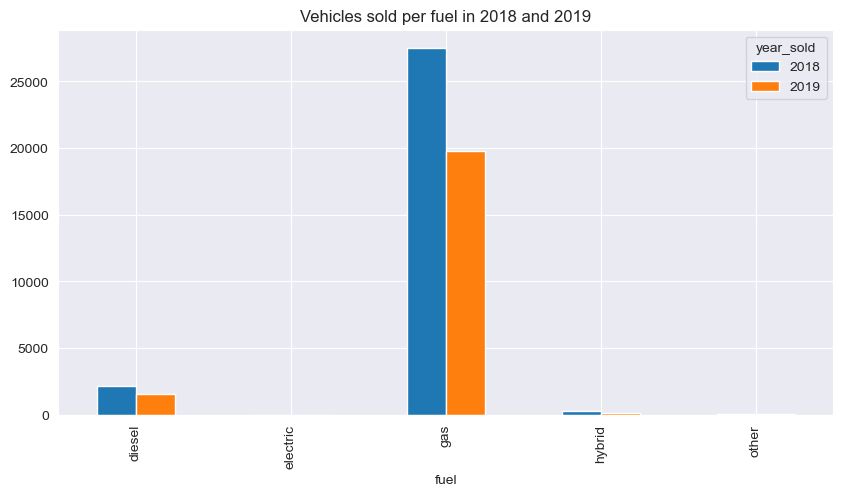

In [241]:
data.pivot_table(index='fuel', columns='year_sold', values='model', aggfunc='count').plot(kind='bar', figsize=(10,5))
plt.title('Vehicles sold per fuel in 2018 and 2019')

Vemos una clara predominancia en GAS.

ESTOS SON LOS DATOS POR TRANSMISION

Text(0.5, 1.0, 'Vehicles sold per transmission in 2018 and 2019')

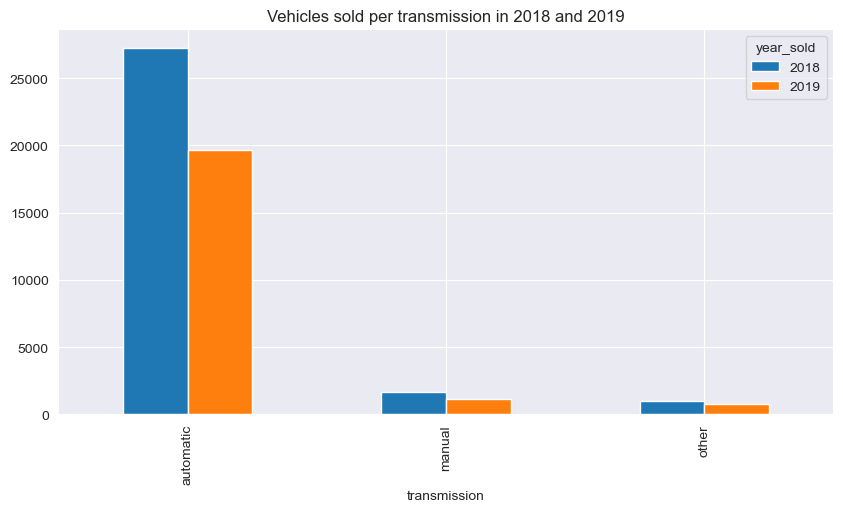

In [242]:
data.pivot_table(index='transmission', columns='year_sold', values='model', aggfunc='count').plot(kind='bar', figsize=(10,5))
plt.title('Vehicles sold per transmission in 2018 and 2019')

Vemos una clara predominancia en automatic.

OBSERVAMOS EL HISTOGRAMA POR TIPO DE VEHICULO

Text(0.5, 1.0, 'Vehicles sold per type in 2018 and 2019')

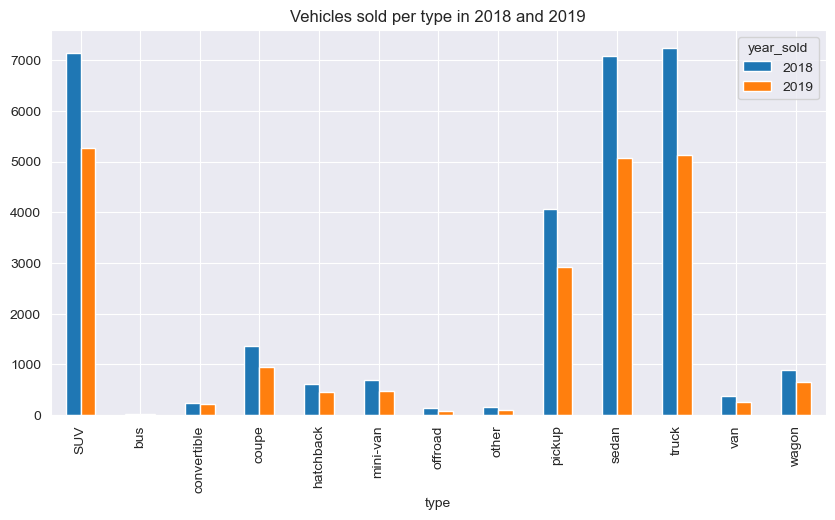

In [243]:
data.pivot_table(index='type', columns='year_sold', values='model', aggfunc='count').plot(kind='bar', figsize=(10,5))
plt.title('Vehicles sold per type in 2018 and 2019')

Sabemos que el valor medio de la columna price es de 12,132.46.
Mientras que el valor maximo de la columna es de 375,000.000

In [244]:
data['price'] = data['price'].fillna(0)

In [247]:
data['price'] = pd.cut(data['price'], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000])

In [248]:
data['price'].value_counts()

(0, 10000]          28226
(10000, 20000]      14564
(20000, 30000]       6129
(30000, 40000]       1879
(40000, 50000]        500
(50000, 60000]        158
(60000, 70000]         41
(70000, 80000]          7
(180000, 190000]        6
(120000, 130000]        3
(80000, 90000]          2
(90000, 100000]         2
(110000, 120000]        2
(370000, 380000]        1
(170000, 180000]        1
(140000, 150000]        1
(130000, 140000]        1
(100000, 110000]        1
(290000, 300000]        1
(380000, 390000]        0
(280000, 290000]        0
(360000, 370000]        0
(350000, 360000]        0
(340000, 350000]        0
(330000, 340000]        0
(320000, 330000]        0
(310000, 320000]        0
(300000, 310000]        0
(200000, 210000]        0
(270000, 280000]        0
(260000, 270000]        0
(250000, 260000]        0
(240000, 250000]        0
(230000, 240000]        0
(220000, 230000]        0
(210000, 220000]        0
(190000, 200000]        0
(160000, 170000]        0
(150000, 160

<AxesSubplot:>

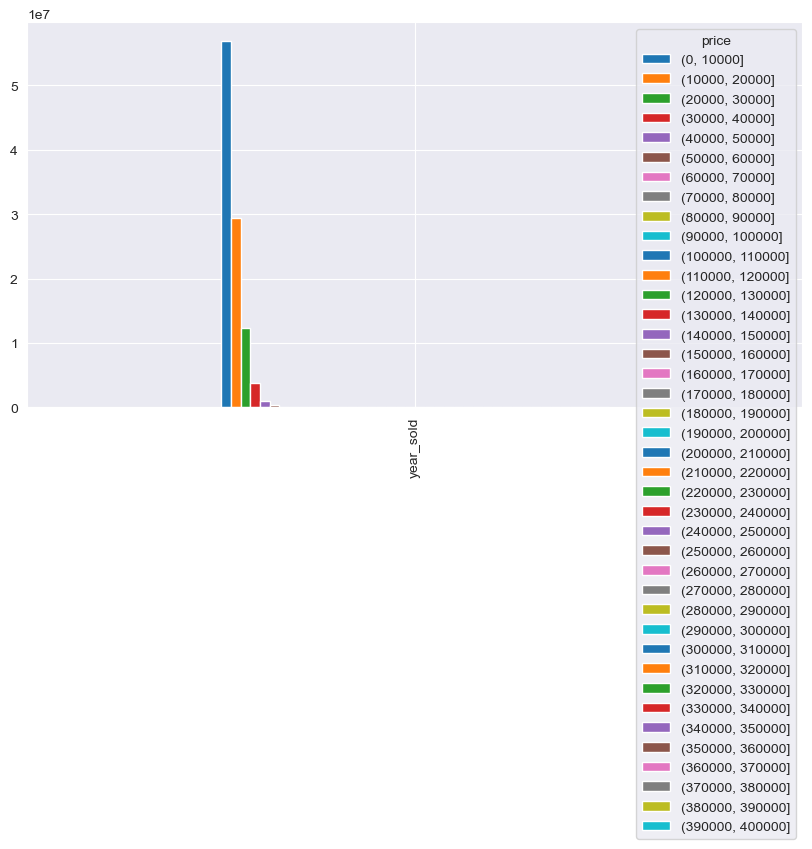

In [249]:
data.pivot_table(columns='price', values='year_sold', aggfunc='sum').plot(kind='bar', figsize=(10,5))


Vamos a sacar las siguientes conclusiones de los histogramas
- 1 mientras que en 2018 hubo un crecimiento positivo vendiendo mas en la segunda mitad del años. En 2019 fue al contrario. Se vendio mas al inicio del año mientras que la segunda mitad del año se vendio menos.
- 2 Hemos descubierto que en esos 2 años la tendencia de venta por modelo es similar mientras que en 2018 la venta es mayor que en 2019 pero las marcas son las mismas (Toyota, Chevrolet y Ford).
- 3 Vemos que ambos años los colores principales son los mismos aunque como dijimos 2018 es proporcionalmente mas elevado. Los colores son los siguientes: Blanco, Negro, Azul, Plateado, Rojo y gris. Esos son los 6 principales. Hemos puesto 6 ya que esos 6 estan cerca en cuanto a cantidad.
- 4 En base a su condicion hay 2 claros representantes de las ventas de ambos años. Unos son de la condicion excelente y los otros son de la condicion buena.
- 5 En base a su cilindrada hay 3 protagonistas que son los de 4.0, 6.0 y 8.0
- 6 Teniendo en cuenta el tipo de Fuel hay un claro protagonista que es Gas.
- 7 Nos pasa algo parecido en el tipo de transmision que es el sistema automatico
- 8 Los ultimos indicadores nos hablan segun el tipo de automovil. Los principales son SUV, Pickup, Sedan y Truck
- 9 En 2018 se vendieron 36.3 millones mientras que en 2019 fueron 26.2 millones es decir un 1.3% de decrecimiento respecto a 2018.
- 10 La mayoria de los vehiculos que se vendieron fueron en la franja de a 10,000.00

COMENZAMOS A ENTRENAR UN SISTEMA EN BASE A LOS VALORES QUE HEMOS OBTENIDO DEL ESTUDIO DE HISTOGRAMA PREVIO.
El primer sistema lo vamos a crear para 2018:


- Sabemos que las ventas en 2018 son de un 1.3% mas
- Sabemos que los SUV se venden un 7% mas, los convertibles un 0.2%, 1,3% los coupe, los hatchback un 0.6%, los mini-van 0.7%, los offroad 0.2%, los pickup 4.0%, Sedan un 7.0%, truck 7.6%, van 0.3% y por ultimo wagon 0.8%

In [ ]:
data['type'] = data['type'].replace('SUV', 0.07)
data['type'] = data['type'].replace('convertible', 0.002)
data['type'] = data['type'].replace('coupe', 0.013)
data['type'] = data['type'].replace('hatchback', 0.006)
data['type'] = data['type'].replace('mini-van', 0.007)
data['type'] = data['type'].replace('offroad', 0.002)
data['type'] = data['type'].replace('pickup', 0.04)
data['type'] = data['type'].replace('sedan', 0.07)
data['type'] = data['type'].replace('truck', 0.076)
data['type'] = data['type'].replace('van', 0.003)
data['type'] = data['type'].replace('wagon', 0.008)
data['type'] = data['type'].replace('bus', 0.005)
data['type'] = data['type'].replace('other', 0.005)

Tambien sabemos que la transmission interfiere en la decision de venta asique segun los histogramas estos serian los porcentajes.
- Si el vehiculo es automatic podemos ver que la decision aumenta en 27%
- Mientras que si es manual es un 3%

In [ ]:
data['transmission'] = data['transmission'].replace('automatic', 0.27)
data['transmission'] = data['transmission'].replace('manual', 0.3)
data['transmission'] = data['transmission'].replace('other', 0.27)

Ahora vamos con la decision de fuel
- Vemos que si el vehiculo es gas es un 27%
- Mientras que si es diesel es un 3%
- Por ultimo si es hybrid es un 1%

In [ ]:
data['fuel'] = data['fuel'].replace('gas', 0.27)
data['fuel'] = data['fuel'].replace('diesel', 0.03)
data['fuel'] = data['fuel'].replace('hybrid', 0.01)
data['fuel'] = data['fuel'].replace('other', 0.0)
data['fuel'] = data['fuel'].replace('electric', 0.0)

Hagamos los mismo con la columna cylinders.
- si es 4.0 es un 8%
- 6.0 es un 9%
- 8.0 es un 10%

In [ ]:
data['cylinders'] = data['cylinders'].replace(4.0, 0.08)
data['cylinders'] = data['cylinders'].replace(6.0, 0.09)
data['cylinders'] = data['cylinders'].replace(8.0, 0.1)

Vamos con la columna condition
- si la condition es excellent es un 15%
- fair es 1%
- good es 11%
- like new es 3%


In [ ]:
data['condition'] = data['condition'].replace('excellent', 0.15)
data['condition'] = data['condition'].replace('fair', 0.01)
data['condition'] = data['condition'].replace('good', 0.11)
data['condition'] = data['condition'].replace('like new', 0.03)
data['condition'] = data['condition'].replace('new', 0.0)
data['condition'] = data['condition'].replace('salvage', 0.0)

El color(paint color) afecta tambien:
- black = 6%
- white = 5,7%
- gray = 2.9%
- green = 0.8%
- blue = 2.5%
- custom = 0.6%
- brown = 0.6%
- red = 2.6%
- orange = 0.2%
- yellow = 0.3%
- purple = 0.1%
- silver = 3.6%

In [ ]:
data['paint_color'] = data['paint_color'].replace('black', 0.06)
data['paint_color'] = data['paint_color'].replace('white', 0.057)
data['paint_color'] = data['paint_color'].replace('grey', 0.029)
data['paint_color'] = data['paint_color'].replace('green', 0.008)
data['paint_color'] = data['paint_color'].replace('blue', 0.025)
data['paint_color'] = data['paint_color'].replace('custom', 0.006)
data['paint_color'] = data['paint_color'].replace('brown', 0.006)
data['paint_color'] = data['paint_color'].replace('red', 0.026)
data['paint_color'] = data['paint_color'].replace('orange', 0.002)
data['paint_color'] = data['paint_color'].replace('yellow', 0.003)
data['paint_color'] = data['paint_color'].replace('purple', 0.001)
data['paint_color'] = data['paint_color'].replace('silver', 0.036)

Ahora vamos con el modelo

acura 0.1
bmw 0.2
buick 0.3
cadillac 0.4
chevrolet 6.2
chrysler 0.4
dodge 0.6
ford 7.5
gmc 1.3
honda 2.1
hyundai 0.6
jeep 1.9
kia 0.3
mercedes-benz 0
nissan 1.8
ram 1.9
subaru 0.6
toyota 3.1
wolkswagen 0.4

In [ ]:

data['model'] = data['model'].replace('acura', 0.1)
data['model'] = data['model'].replace('bmw', 0.2)
data['model'] = data['model'].replace('buick', 0.3)
data['model'] = data['model'].replace('cadillac', 0.4)
data['model'] = data['model'].replace('chevrolet', 0.62)
data['model'] = data['model'].replace('chrysler', 0.4)
data['model'] = data['model'].replace('dodge', 0.6)
data['model'] = data['model'].replace('ford', 0.75)
data['model'] = data['model'].replace('gmc', 0.13)
data['model'] = data['model'].replace('honda', 0.21)
data['model'] = data['model'].replace('hyundai', 0.6)
data['model'] = data['model'].replace('jeep', 0.19)
data['model'] = data['model'].replace('kia', 0.3)
data['model'] = data['model'].replace('mercedes-benz', 0)
data['model'] = data['model'].replace('nissan', 0.18)
data['model'] = data['model'].replace('ram', 0.19)
data['model'] = data['model'].replace('subaru', 0.6)
data['model'] = data['model'].replace('toyota', 0.31)
data['model'] = data['model'].replace('volkswagen', 0.4)
data['model'] = data['model'].replace('other', 0.0)
data['model'] = data['model'].replace('bus', 0.0)

In [ ]:
data['probabilidad'] = data['model'] + data['condition'] + data['cylinders'] + data['fuel'] + data['paint_color'] + data['type'] + data['transmission'] + data['is_4wd']

In [ ]:
data['model'].value_counts()

In [ ]:
data.dtypes

In [ ]:
data.head()

Al final hemos conseguido un % de probabilidad de venta por diferentes factores que estan en cada columna y una ultima columna donde indica la probabilidad exacta por cada fila.